<!-- <img src='img/fastcamp_h.png'> -->

# 5. Deep Learning from Basic Method 2 with Keras

# AI의 겨울

* perceptron이 이렇게 강력했지만 이후 ai는 20년에 가까운 시간 동안 "AI Winter"라는 시기를 겪음
* 왜 그럴까?

# XOR PROBLEM; 비선형 문제

<img src='img/05_01.png' width=50% height=50%>

* 기존의 AND 문제, OR 문제는 방정식 1개로 (선형으로) 문제를 해결 할 수 있었음
* 그러나 XOR는 1개의 방정식으로 해결 할 수 없음
  * 이 문제를 perceptron은 절대 해결 할 수 없기 때문에 AI winter가 찾아옴
  * 1969년 Marvin Minsky와 Seymour Papert의 “Perceptrons: an introduction to computational geometry”

# Multi-Layer Perceptron(MLP) 의 등장

* 1986년 McClelland, James L., David E. Rumelhart, and **Geoffrey E. Hinton**이 MLP를 발표
* 이전 perceptron의 출력을 또다른 perceptron의 입력으로 사용하고 현재 출력에 비선형 step function을 사용하여 MLP가 비선형으로 동작하게 함

# 선형 분류와 비선형 분류의 차이

<center><img src='img/05_03.png'></center>

# 다시보는 Perceptron의 구조

<center><img src='img/03_01.png'></center>

* input($x_n$): 외부에서 들어오는 입력, 보통 vector, matrix
* weight($w_n$): x와 곱해지는 가중치, DL에서 구해야하는 값
* bias($1$): 바이어스, 절편 값
* sigma: x와 w의 곱 + bias의 합을 출력
* step function: 해당 출력의 활성 여부를 결정

# Multi-Layer Perceptron의 구조

<center><img src='img/05_02.png'></center>

* input layer: 외부에서 들어오는 입력, 보통 vector, matrix
* hidden layer:
 1. 각 노드는 이전 layer의 출력을 입력으로 받음
 2. hidden layer의 각 노드는 step funtion을 가짐
 3. hidden layer는 여러장 올 수 있음
<br><br>
* hidden layer의 각 노드
 * weight($w_n$): 이전 입력과 곱해지는 가중치, DL에서 구해야하는 값
 * bias($1$): 바이어스, 절편 값
 * sigma: 입력과 w의 곱 + bias의 합을 출력
 * activation/step function: 해당 출력의 활성 여부를 결정

In [19]:
import keras
from keras.layers import Dense
from keras.models import Sequential
import numpy as np

model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse')

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])
hist = model.fit(X, Y, epochs=3000, verbose=0)

H = (model.predict(X) > 0.5).astype(np.float32)
for loss in hist.history['loss'][::300]:
    print('오차:', loss)
print('정확도:', np.mean(np.equal(H, Y)))

오차: 1.1934709548950195
오차: 0.1989368498325348
오차: 0.15673863887786865
오차: 0.12096760421991348
오차: 0.0845719426870346
오차: 0.05304841324687004
오차: 0.02948678657412529
오차: 0.014505070634186268
오차: 0.0064311884343624115
오차: 0.002637288300320506
정확도: 1.0


<center><img src='img/05_04.png' width=30% height=30%></center>

# Activation을 선형으로 바꾸면 어떻게 될까?

In [20]:
import keras
from keras.layers import Dense
from keras.models import Sequential
import numpy as np

model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='linear'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse')

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])
hist = model.fit(X, Y, epochs=3000, verbose=0)

H = (model.predict(X) > 0.5).astype(np.float32)
for loss in hist.history['loss'][::300]:
    print('오차:', loss)
print('정확도:', np.mean(np.equal(H, Y)))

오차: 1.3322943449020386
오차: 0.25137215852737427
오차: 0.2500744163990021
오차: 0.25000476837158203
오차: 0.2500002980232239
오차: 0.2500000298023224
오차: 0.25
오차: 0.25
오차: 0.2499999701976776
오차: 0.25
정확도: 0.75


In [22]:
import keras
from keras.layers import Dense
from keras.models import Sequential
import numpy as np

model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='linear'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse')

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])
hist = model.fit(X, Y, epochs=30000, verbose=0)

H = (model.predict(X) > 0.5).astype(np.float32)
for loss in hist.history['loss'][::3000]:
    print('오차:', loss)
print('정확도:', np.mean(np.equal(H, Y)))

오차: 0.9149474501609802
오차: 0.25
오차: 0.25
오차: 0.25
오차: 0.25
오차: 0.25
오차: 0.25
오차: 0.25
오차: 0.25
오차: 0.25
정확도: 0.25


# 선형은 아무리 겹쳐도 선형

* XOR MLP의 수식을 다음과 같다고 가정

\begin{align}
g(f(x)) = y \nonumber
\end{align}

\begin{align}
f(x) = ax + b \nonumber \\
g(x) = cx + d \nonumber \\
z(x) = mx + n \nonumber
\end{align}

\begin{align}
g(f(x)) &= y \nonumber \\
&= c(ax + b) + d \nonumber \\
&= cax + cb + d \nonumber \\
&= (ca)x + (cb + d), ca \rightarrow m, cb + d \rightarrow n  \nonumber \\
&= mx + n \nonumber \\
&= z(x) \nonumber
\end{align}

# 왜 이렇게 오래걸렸나?

* 우리가 보기에 바뀐게 거의 없을 정도
* 그런데 왜 20여년 정도 AI winter였을까?

# Loss Funtion의 어려움

* Marvin Minsky 교수는 MLP와 같은 개념으로 XOR를 풀 수 있다는 것은 알고 있었음
* 그러나 MLP 같은 방식의 모델에서 loss/cost function을 수행하는 것이 불가능하다고 단정

<center><img src='img/03_05.png' width=100% height=100%></center>

* 5~6년 뒤 MIT 박사과정의 Paul werbos가 backpropagation를 통한 학습이 가능함을 연구하였지만 당시 분위기상 무시됨
* 그것을 박사과정 중이던 르쿤 교수가 다시 찾아내고(1984), 2년 뒤 힌튼 교수가 백프로퍼게이션을 재정립(1986) 시키면서 MLP가 부활함

<center><img src='img/05_04.png' width=100% height=100%></center>

# Backpropagation (역전파)

* chain-rule을 이용하는 그라디언트 디센트 방식
* ANN을 효율적으로 학습하기 위하여 가중치 업데이트를 반복/재귀적으로 역순 수행함
* activation의 결과를 어떻게 미분할지 설정해야함
 * 최근 많은 라이브러리에서 Automatic differentiation를 제공하여 사용자가 function에 대한 미분을 정의할 필요는 없음
* 일반적으로 그라디언트 디센트를 통하여 loss function의 기울기를 계산하여 가중치를 조절함

# Backprop의 concept

## Gradient Descent

* 함수를 미분하여 오차가 감소하는 방향으로 $\alpha$만큼 기울기를 조절

## Chain-rule을 이용한 computation graph

* 계산 연산을 그래프 구조 형태로 변환하여 복잡한 미분을 쉽게 분해하여 단계별로 하는 기법
* 즉, computation graph를 이용하여 복잡한 수식을 미분 입장에서 쉽게 변경한 뒤 각각을 미분하여 GD방법으로 오차를 줄임

$$ f(x,y,z) = (x+y)z \nonumber $$

$$ x = -2 \nonumber $$
$$ y = 5 \nonumber $$
$$ z = -4 \nonumber $$

<center><img src='img/05_08.png' width=50% height=50%></center>

* chain-rule을 적용하기 위해 다음과 같이 치환 가능
$$ f(x,y,z) = g(h(x,y),z) \nonumber $$
$$ h(x,y) = x + y, g(a,b) = a * b \nonumber $$

$$ \frac{df}{dx} =  \frac{dg}{dh}\frac{dh}{dx} \nonumber $$

$$ \frac{df}{dy} =  \frac{dg}{dh}\frac{dh}{dy} \nonumber $$

$$ q = x + y, \frac{dq}{dx} = 1,  \frac{dq}{dy} = 1 \nonumber $$

$$ f = qz, \frac{df}{dq} = z, \frac{df}{dz} = q \nonumber $$





<center><img src='img/05_09.png' width=50% height=50%></center>

<center><img src='img/05_10.png' width=50% height=50%></center>

<center><img src='img/05_11.png' width=50% height=50%></center>

<center><img src='img/05_12.png' width=50% height=50%></center>

<center><img src='img/05_13.png' width=50% height=50%></center>

<center><img src='img/05_14.png' width=50% height=50%></center>

# computation graph의 핵심

* 전역적 미분을 연산당 국소적 미분으로 변경함

<center><img src='img/05_15.png' width=50% height=50%></center>

* 모든 연산 입장에서는 들어오는 오차에 대해서만 미분하면 연쇄적으로 전체를 미분하는 효과
<center><img src='img/05_16.png' width=50% height=50%></center>

* https://slideplayer.com/slide/14389002/ 예제를 포함한 설명

* 결과적으로 MLP의 연결은 다음과 같은 형태의 그래프로 표현 될 수 있음
<center><img src='img/05_17.png' width=50% height=50%></center>

* 재귀적으로 미분을하여 뒤로 보냄 
<center><img src='img/05_18.png' width=50% height=50%></center>

# 그래도 AI의 봄은 찾아오지 않았다..

* 왜?
 * XOR 같은 비선형 문제를 MLP로 학습 할 수 있고
 * MLP의 loss를 개선함이 어려운 것도 backprop과 computation graph를 이용하여 해결했는데?

## 여기에는 2가지 이유가 있음
 1. 그당시 MLP가 복잡한 것에 비하여 모델의 성능이 SVM(support vector machine)에 비하여 많이 떨어졌음
 2. Layer가 깊어지면 깊어질수록 제대로 backprop으로 학습이 되지 않았음
 3. 깊지 않은 layer에서도 계수가 폭발하면서 학습이 제대로 되지 않는 경우가 발생

# exploding gradient와 vanishing gradient

 * 자꾸 문제만 나오는 MLP는 언제 빛을 볼 수 있을것인가..
 
 * exploding gradient는 gd를 수행 중 계수 값이 음수나 양수 방향으로 폭발하여 inf이나 nan을 떨어뜨리는 문제
 * vanishing gradient는 gd를 수행 할 때 backprop시 전달 되는 값이 너무 작아 오차가 수정이 안되는 문제

# vanishing gradient

* MLP의 비선형성을 위해 퍼셉트론의 출력에 비선형 activation 함수를 부여함
* 당시에는 보통 tanh와 sigmoid를 주로 씀
* tanh와 sigmoid 그래프는 다음과 같음

<center><img src='img/04_04.png' width=50% height=50%></center>

# vanishing gradient

* 해당 함수는 미분했을 때 문제가 발생하게 됨
* sigmoid와 tanh의 도함수 그래프는 다음과 같음

<center><img src='img/05_19.png' width=50% height=50%></center>

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

#activation이 선형인 모델
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='linear'))
model.compile(loss='mse', optimizer=SGD(lr=0.01))

X = np.array([1,2,3,4,5])
Y = X * 3.6 + 6

hist = model.fit(X, Y, epochs=2000, verbose=0)
hist.history['loss'][::200]

[171.4031982421875,
 1.1729990243911743,
 0.3026695251464844,
 0.0780981034040451,
 0.0201517753303051,
 0.005199815612286329,
 0.0013417209265753627,
 0.0003461816522758454,
 8.932749187806621e-05,
 2.3057200451148674e-05]

In [27]:
#모델 구조에 대한 요약
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [33]:
W, b = model.get_layer(index=0).get_weights()
print(W, b)

[[3.6015837]] [5.994282]


In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

X = np.array([1,2,3,4,5])
Y = X * 3.6 + 6

#깊이가 3인 모델
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer=SGD(lr=0.01))

hist = model.fit(X, Y, epochs=2000, verbose=0)
hist.history['loss'][::200]

[315.59112548828125,
 25.31235122680664,
 10.003190994262695,
 3.4869384765625,
 2.197185754776001,
 1.7836532592773438,
 1.5377938747406006,
 1.3311073780059814,
 1.1565889120101929,
 1.012955904006958]

In [64]:
W, b = model.get_layer(index=0).get_weights()
print(W, b)

[[-1.0560945]] [2.8487778]


In [63]:
#모델 구조에 대한 요약
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [66]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

#깊이가 4인 모델
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer=SGD(lr=0.01))

X = np.array([1,2,3,4,5])
Y = X * 3.6 + 6

hist = model.fit(X, Y, epochs=2000, verbose=0)
hist.history['loss'][::200]

[324.3424987792969,
 25.939754486083984,
 25.93108558654785,
 25.9239559173584,
 25.91716957092285,
 25.909704208374023,
 25.900135040283203,
 25.885562896728516,
 25.858245849609375,
 25.788105010986328]

# 20년 동안의 딥러닝의 겨울

* 해당 문제는 20년 동안 고쳐지지 않음
* 문제가 어려운 것도 있었으나, 여러번의 위기를 맞아 많은 연구자들이 떠남
* 그리나 2006년 힌톤 교수가 새로운 activation과 학습 방법을 가지고 다시 찾아옴

# 힌톤 교수의 요약
1. 우리는 학습셋을 너무 조금 써왔던 것이 아닐까?
2. 우리의 컴퓨터가 너무 느렸던 것이 아닐까?
3. 우리의 w초기화 방법이 잘못됐던 것이 아닐까?
4. <b>우리는 잘못된 activation function을 써왔던 것이 아닐까?</b>

#  Rectified Linear Unit: ReLU의 등장

* $relu(x) = max(0, x)$의 아주 단순한 함수
* 0 > x의 구간은 기울기가 0, 0 < x 의 구간은 기울기가 1이기 때문에 선형이 아님

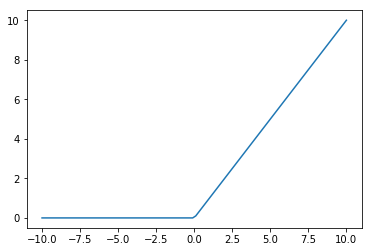

In [56]:
def relu(x):
    return np.maximum(0, x)

X = np.linspace(-10, 10, 100)
plt.plot(X, relu(X))
plt.show()

In [59]:
#XOR 문제 by relu

import keras
from keras.layers import Dense
from keras.models import Sequential
import numpy as np

model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='relu'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse')

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])
hist = model.fit(X, Y, epochs=3000, verbose=0)

H = (model.predict(X) > 0.5).astype(np.float32)
for loss in hist.history['loss'][::300]:
    print('오차:', loss)
print('정확도:', np.mean(np.equal(H, Y)))

오차: 1.42637038230896
오차: 0.07743463665246964
오차: 0.011617137119174004
오차: 0.0018648796249181032
오차: 0.0002775207394734025
오차: 3.9362617826554924e-05
오차: 5.514316399057861e-06
오차: 7.770465231260459e-07
오차: 1.0769497293949826e-07
오차: 1.5033709388490024e-08
정확도: 1.0


In [92]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

#깊이가 4인 모델
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='relu'))
model.add(Dense(1, activation='relu'))
model.add(Dense(1, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer=SGD(lr=0.01))

X = np.array([1,2,3,4,5])
Y = X * 3.6 + 6

hist = model.fit(X, Y, epochs=2000, verbose=0)
hist.history['loss'][::200]

[308.1600036621094,
 26.00730323791504,
 25.920024871826172,
 25.919998168945312,
 25.919998168945312,
 25.919998168945312,
 25.919998168945312,
 25.919998168945312,
 25.919998168945312,
 25.919998168945312]

In [94]:
W, b = model.get_layer(index=0).get_weights()
print(W, b)
W, b = model.get_layer(index=1).get_weights()
print(W, b)
W, b = model.get_layer(index=2).get_weights()
print(W, b)
W, b = model.get_layer(index=3).get_weights()
print(W, b)

[[0.89397156]] [0.]
[[-1.1320183]] [0.]
[[-1.3468701]] [0.]
[[-0.17741084]] [16.799953]


# dying reLU problem!!!

* relu는 입력값이 0 이하로 들어오면 activation 자체가 먹통이 됨
* 출력을 0으로 주어로 비선형으로 동작하게 했지만 퍼셉트론이 많이 0이 되면 제대로 동작하지 않을 수 있음

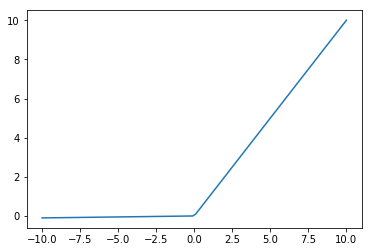

In [95]:
#아주 작은 기울기를 0 이하에 주어 죽지 않게 하자!
def leaky_relu(x):
    return np.where(x > 0, x, x * 0.01)

X = np.linspace(-10, 10, 100)
plt.plot(X, leaky_relu(X))
plt.show()

In [98]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

#깊이가 4인 모델
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation=tf.nn.leaky_relu))
model.add(Dense(1, activation=tf.nn.leaky_relu))
model.add(Dense(1, activation=tf.nn.leaky_relu))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer=SGD(lr=0.01))

X = np.array([1,2,3,4,5])
Y = X * 3.6 + 6

hist = model.fit(X, Y, epochs=2000, verbose=0)
hist.history['loss'][::200]

[307.1714782714844,
 1.3407058077063994e-06,
 1.6007107098148232e-11,
 1.6007107098148232e-11,
 1.6007107098148232e-11,
 1.6007107098148232e-11,
 1.6007107098148232e-11,
 1.6007107098148232e-11,
 1.6007107098148232e-11,
 1.6007107098148232e-11]

In [99]:
W, b = model.get_layer(index=0).get_weights()
print(W, b)
W, b = model.get_layer(index=1).get_weights()
print(W, b)
W, b = model.get_layer(index=2).get_weights()
print(W, b)
W, b = model.get_layer(index=3).get_weights()
print(W, b)

[[-3.1125581]] [0.24710971]
[[3.029983]] [0.09196756]
[[-3.0472865]] [1.2211454]
[[3.131636]] [2.6371586]


In [82]:
hist.history['loss']

[308.15997314453125,
 296.9832763671875,
 286.24920654296875,
 275.94012451171875,
 266.03936767578125,
 256.5306396484375,
 247.3984375,
 238.62789916992188,
 230.2046661376953,
 222.114990234375,
 214.3456573486328,
 206.88400268554688,
 199.7178497314453,
 192.83544921875,
 186.22561645507812,
 179.8775177001953,
 173.78079223632812,
 167.9254913330078,
 162.30206298828125,
 156.90133666992188,
 151.71446228027344,
 146.7330322265625,
 141.94882202148438,
 137.35409545898438,
 132.9412841796875,
 128.7032470703125,
 124.63304138183594,
 120.7239990234375,
 116.96977233886719,
 113.36418151855469,
 109.9013900756836,
 106.57574462890625,
 103.38175964355469,
 100.31428527832031,
 97.3682632446289,
 94.53892517089844,
 91.82160949707031,
 89.21190643310547,
 86.70555114746094,
 84.29844665527344,
 81.98664855957031,
 79.76640319824219,
 77.63410186767578,
 75.58622741699219,
 73.61944580078125,
 71.73054504394531,
 69.91645050048828,
 68.17418670654297,
 66.50091552734375,
 64.8939056

$$ f(x, y) = mse(xW + b, y) $$
<center><img src='img/05_05.png' width=50% height=50%></center>

$$ mse(x, y) = ((xW + b) - y)^2 $$

<center><img src='img/05_06.png' width=50% height=50%></center>

In [3036]:
import numpy as np
import matplotlib.pylab as plt

def h(x, params):
    w1 = params[0]
    b = params[1]
    return w1 * x + b

def j(y_, y):
    return sum((y_-y)**2)/len(y_)

In [3041]:
x = np.array([3, 5])
y = np.array([303, 503])
params = np.array([3.5, 1])

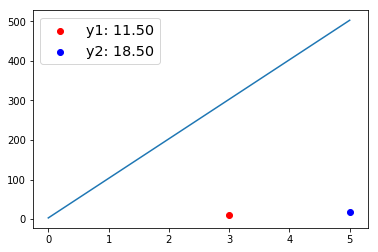

In [3042]:
y_ = h(x, params)

plt.plot(np.array([0,1,2,3,4,5]), 100 * np.array([0,1,2,3,4,5]) + 3)
plt.scatter(x[0], y_[0], color='red', label='y1: {:.2f}'.format(y_[0]))
plt.scatter(x[1], y_[1], color='blue', label='y2: {:.2f}'.format(y_[1]))
plt.legend(loc='upper left', fontsize='x-large')
plt.show()

319712.5 1 [323.2125   1.001 ]


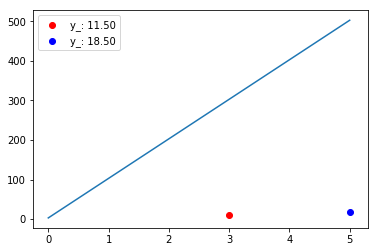

In [3043]:
def derivative_w(x):
    return -200 * ()

def derivative_b(x):
    return 1

alpha = 0.001

y_ = h(x, params)
delta_w = derivative_w(j(y_, y))
delta_b = derivative_b(j(y_, y))

params[0] += delta_w * alpha
params[1] += delta_b * alpha
print(delta_w, delta_b, params)

plt.plot(np.array([0,1,2,3,4,5]), 100 * np.array([0,1,2,3,4,5]) + 3)
plt.scatter(x[0], y_[0], color='red', label='y_: {:.2f}'.format(y_[0]))
plt.scatter(x[1], y_[1], color='blue', label='y_: {:.2f}'.format(y_[1]))
plt.legend()
plt.show()

In [3008]:
y_ = h(x, params)
delta_w = derivative_w(j(y_, y))
delta_b = derivative_b(j(y_, y))

params[0] += delta_w * alpha
params[1] += delta_b * alpha
print(params)

'''
plt.plot(np.array([0,1,2,3,4,5]), 100 * np.array([0,1,2,3,4,5]) + 3)
plt.scatter(x[0], y_[0], color='red', label='y_: {:.2f}'.format(y_[0]))
plt.scatter(x[1], y_[1], color='blue', label='y_: {:.2f}'.format(y_[1]))
plt.legend()
plt.show()
'''

[ inf 1.14]


"\nplt.plot(np.array([0,1,2,3,4,5]), 100 * np.array([0,1,2,3,4,5]) + 3)\nplt.scatter(x[0], y_[0], color='red', label='y_: {:.2f}'.format(y_[0]))\nplt.scatter(x[1], y_[1], color='blue', label='y_: {:.2f}'.format(y_[1]))\nplt.legend()\nplt.show()\n"

# Backprop의 concept

## Chain-rule

* $model = \sigma(f(x)), f(x) = w_1x + b, \sigma(x) = \frac{1}{1+e^{-x}}$이라는 함수가 있다고 가정
* 우리에게 주어진 x, y 정보는 다음과 같다고 가정
 * $x = 3, y = 0.2$
* 우리는 $w_1 = ?, b = ?$을 알아내고 싶음
* 초기 $w_1 = 1.1, b = 0.5, \alpha = 0.01$로 세팅되었다고 가정함
 * $h(x) = \sigma(w_1x + b), w_1 = 1.1, b = 0.5$
* loss function은 $(h(x)-y)^2$라고 가정

* $y = f(g(x))$의 꼴은 다음과 같이 미분된다.
 * $y' = f'(g(x)) *g'(x)$

* 즉, $model = \sigma(f(x))$는 다음과 같이 미분됨.
 * $model' = \sigma'(f(x)) * f'(x)$
 * $\sigma' = \frac{e^{-x}}{(1+e^{-x})^2}$
 * $f' = w_1$
 
 * $model' = \sigma'(f(x)) * f'(x)$

In [74]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def f(x, params):
    w1 = params[0]
    b = params[1]
    return w1 * x + b

def dsigmoid(x):
    return np.exp(-x)/((1+np.exp(-x))**2)

def df(x, parmas):
    return parmas[0]

def h(x, params):
    return sigmoid(f(x, params))
    
def dh(x, params):
    return dsigmoid(f(x, params)) * df(x, params)
    
def j(y_, y):
    return (y_-y)**2

In [28]:
y = 0.2
params = [1.1, 0.5]

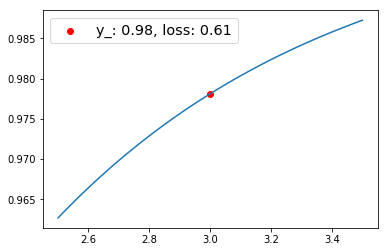

In [29]:
y_ = h(3, params)

x = np.linspace(2.5, 3.5)
plt.plot(x, h(x, params))
plt.scatter(3, y_, color='red', label='y_: {:.2f}, loss: {:.2f}'.format(y_, j(y_, y)))
plt.legend(loc='upper left', fontsize='x-large')
plt.show()

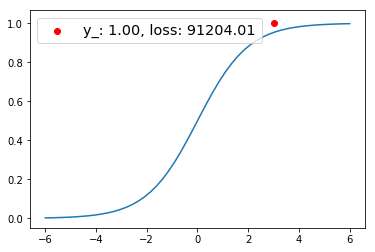

In [20]:
x = np.linspace(-6, 6)
plt.plot(x, sigmoid(x))
plt.scatter(3, y_, color='red', label='y_: {:.2f}, loss: {:.2f}'.format(y_, j(y_, y)))
plt.legend(loc='upper left', fontsize='x-large')
plt.show()

In [15]:
np.linspace(2.5, 3.5)

array([2.5       , 2.52040816, 2.54081633, 2.56122449, 2.58163265,
       2.60204082, 2.62244898, 2.64285714, 2.66326531, 2.68367347,
       2.70408163, 2.7244898 , 2.74489796, 2.76530612, 2.78571429,
       2.80612245, 2.82653061, 2.84693878, 2.86734694, 2.8877551 ,
       2.90816327, 2.92857143, 2.94897959, 2.96938776, 2.98979592,
       3.01020408, 3.03061224, 3.05102041, 3.07142857, 3.09183673,
       3.1122449 , 3.13265306, 3.15306122, 3.17346939, 3.19387755,
       3.21428571, 3.23469388, 3.25510204, 3.2755102 , 3.29591837,
       3.31632653, 3.33673469, 3.35714286, 3.37755102, 3.39795918,
       3.41836735, 3.43877551, 3.45918367, 3.47959184, 3.5       ])

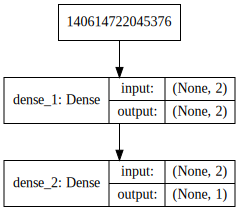

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, True).create(prog='dot', format='svg'))

In [ ]:
y = 303
params = [3.5, 1]

In [1]:
import tensorflow as tf

In [1460]:
w = tf.Variable([3.5])
b = tf.Variable([1.])
x = tf.constant([3., 5.])
y_ = tf.constant([303., 503.])

y = x * w + b
cost = tf.reduce_mean(tf.square(y_ - y))
optimizer = tf.train.GradientDescentOptimizer(0.05)
train = optimizer.minimize(cost)

In [1461]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [2432]:
sess.run(train)
[W,B, C] = sess.run([w,b,cost])
print(W,B,C)

[99.97955] [3.0865886] 0.00044102687
